<a href="https://colab.research.google.com/github/Krls26/IA-USTA/blob/main/FUZZY/Ejercicio_del_avion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalar la libreria

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.6 MB/s eta 0:00:00


# Importar las librerias

In [3]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Variable de velocidad

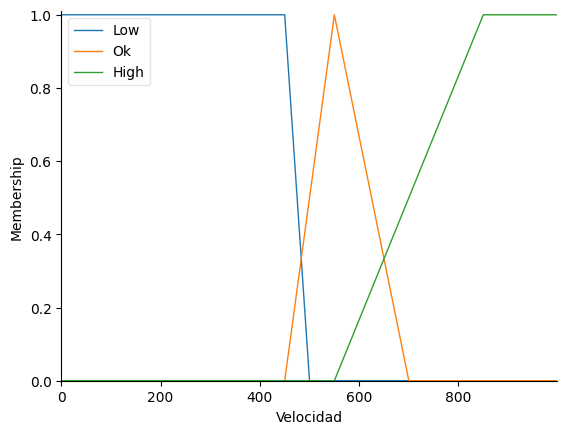

In [23]:
Ve=ctrl.Antecedent(np.arange(0,1000,1),'Velocidad')
Ve['Low']=fuzz.trapmf(Ve.universe,[0,0,450,500])
Ve['Ok']=fuzz.trimf(Ve.universe,[450,550,700])
Ve['High']=fuzz.trapmf(Ve.universe,[550,850,1000,1000])
Ve.view()

# Variable de ángulo

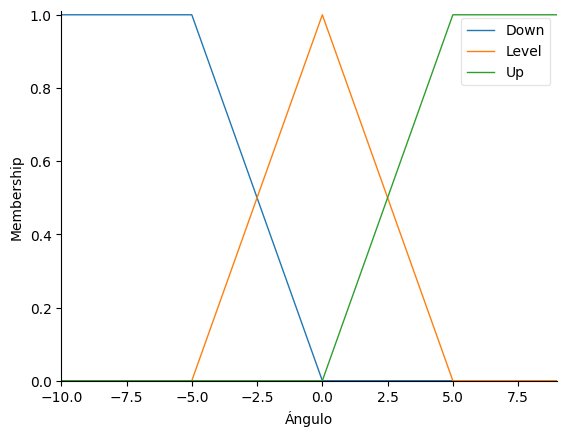

In [21]:
An=ctrl.Antecedent(np.arange(-10,10,1),'Ángulo')
An['Down']=fuzz.trapmf(An.universe,[-10,-10,-5,0])
An['Level']=fuzz.trimf(An.universe,[-5,0,5])
An['Up']=fuzz.trapmf(An.universe,[0,5,10,10])
An.view()

# Salida "Posición"

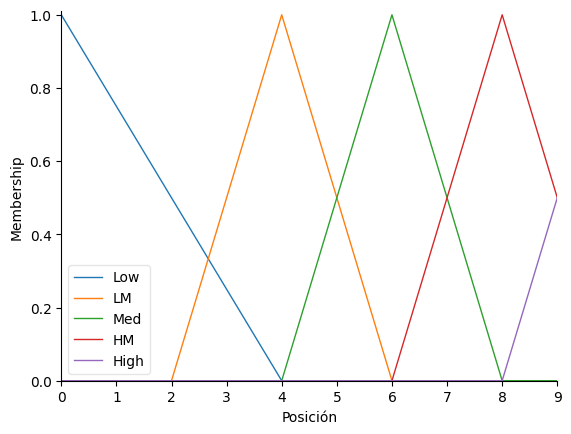

In [19]:
Ps=ctrl.Consequent(np.arange(0,10,1),'Posición')
Ps['Low']=fuzz.trapmf(Ps.universe,[0,0,0,4])
Ps['LM']=fuzz.trimf(Ps.universe,[2,4,6])
Ps['Med']=fuzz.trimf(Ps.universe,[4,6,8])
Ps['HM']=fuzz.trimf(Ps.universe,[6,8,10])
Ps['High']=fuzz.trapmf(Ps.universe,[8,10,10,10])
Ps.view()

# Reglas

In [28]:
rule1=ctrl.Rule(Ve['High'] & An['Up'],Ps['LM'])
rule2=ctrl.Rule(Ve['High'] & An['Level'],Ps['LM'])
rule3=ctrl.Rule(Ve['High'] & An['Down'],Ps['Low'])
rule4=ctrl.Rule(Ve['Ok'] & An['Up'],Ps['HM'])
rule5=ctrl.Rule(Ve['Ok'] & An['Level'],Ps['Med'])
rule6=ctrl.Rule(Ve['Ok'] & An['Down'],Ps['LM'])
rule7=ctrl.Rule(Ve['Low'] & An['Up'],Ps['High'])
rule8=ctrl.Rule(Ve['Low'] & An['Level'],Ps['HM'])
rule9=ctrl.Rule(Ve['Low'] & An['Down'],Ps['HM'])

# Defuzzificación


In [32]:
Ps_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

In [33]:
Position = ctrl.ControlSystemSimulation(Ps_ctrl)

In [34]:
Position.input['Velocidad']=515
Position.input['Ángulo']=-2.5
Position.compute()

5.0


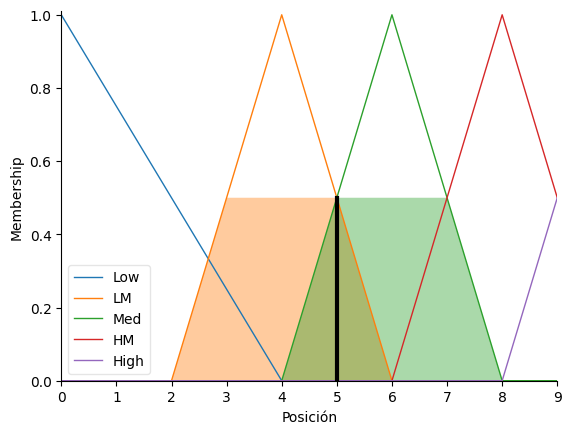

In [35]:
print(Position.output['Posición'])
Ps.view(sim=Position)